#### Name: ADEIKA, Blessing Isoyiza

#### Student ID: 00325967

#### Course: COSC 680 - Image Understanding and Computer Vision(CRN 74798)

#### Instructor: Dr. MD Mahmudur Rahman

#### Date: 26th of September, 2022

#### Question 1: Point Processing

In [ ]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt


# a. Read RGB image
beach = cv2.imread('beach.jpg')

# b. Convert to graylevel image
gray_beach = cv2.cvtColor(beach, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Level Beach Image", gray_beach)

# Histogram
hist_gray = cv2.calcHist([gray_beach], [0], None,[256], [0, 256])
plt.figure()
plt.title("Histogram for gray level Beach Image")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")
plt.plot(hist_gray)
plt.xlim([0,256])
plt.show()
cv2.waitKey(0)


# c. Perform the Negative operation s=(L-1)-r and display image
beach_negative = (256 - 1) - gray_beach
cv2.imshow("Negative Operation on Beach Image", beach_negative)
cv2.waitKey(0)


# d. Use log transform s =c*log(l+r) for contrast stretching and display the image
c= 255 / np.log(1 + np.max(gray_beach))
log_beach = c * (np.log(gray_beach + 1))
log_beach = np.array(log_beach, dtype = np.uint8)
cv2.imshow("Log transform for Beach Image", log_beach)
cv2.waitKey(0)

# e. Improve the contrast in an Image
improved_contrast = np.zeros((gray_beach.shape[0],gray_beach.shape[1]),dtype = 'uint8')
height,width = gray_beach.shape

for x in range(height):
    for y in range(width):
        outer_min = gray_beach[x,y] - np.min(gray_beach)
        inner_formular = (255/(np.max(gray_beach)-np.min(gray_beach)))
        
        # improved_contrast[x,y] = 255*(gray_beach[x,y]-np.min(gray_beach))/(np.max(gray_beach)-np.min(gray_beach))
        improved_contrast[x,y] = outer_min * inner_formular

cv2.imshow("Improved Contrast Image", improved_contrast)
cv2.waitKey(0)

# Histogram for Improved Contrast - stretched 
hist_improv = cv2.calcHist([improved_contrast], [0], None,[256], [0, 256])
plt.figure()
plt.title("Histogram for Improved Contrast Image")
plt.xlabel("Bins")
plt.ylabel("Pixels")
plt.plot(hist_improv)
plt.xlim([0,256])
plt.show()
# cv2.waitKey(0)

# f. Gamma Correction s=c*r^gamma 
# loop over  gamma  values in the range [0, 3.0] , incrementing by 0.5 at each step

for gamma in [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]:
        
# g. Display the output   images (scaled back to the range [0, 255])
    gamma_correction = np.array(255*(gray_beach / 255) ** gamma, dtype = 'uint8')
    cv2.imshow("Gamma Correction "+str(gamma), gamma_correction)
    cv2.waitKey(0)

#### Question 2:Gray Level Slicing 

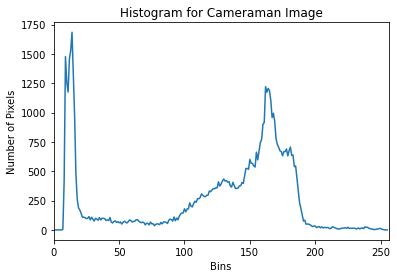

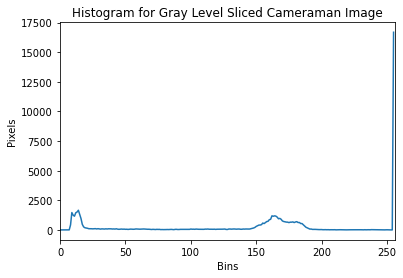

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg


# a. Load the image  cameraman.tif  
cameraman = cv2.imread("cameraman.tif")

# b. display the image and its histogram 
cv2.imshow("Cameraman Image", cameraman)
cv2.waitKey(0)

    # Histogram
hist_cameraman = cv2.calcHist([cameraman], [0], None,[256], [0, 256])
plt.figure()
plt.title("Histogram for Cameraman Image")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")
plt.plot(hist_cameraman)
plt.xlim([0,256])
plt.show()

# c. Perform gray level slicing  based on the above figure by considering   A =100 and B = 150 
cameraman = cv2.imread('cameraman.tif',0)
x,y = cameraman.shape
A = 100
B = 150

sliced_cameraman = np.zeros((x,y), dtype='uint8')

for i in range(x):
    for j in range(y):
        if A < cameraman[i,j] and cameraman[i,j] < B:
            sliced_cameraman[i,j]= 255
        else:
            sliced_cameraman[i,j] = cameraman[i-1,j-1]
# cv2.imwrite("Gray Level Slicing on Cameraman image.png", sliced_cameraman)

# d. Display the images and histograms after slicing 
cv2.imshow("Gray Level Slicing on Cameraman image", sliced_cameraman)
cv2.waitKey(0)
    # Histogram
hist_sliced = cv2.calcHist([sliced_cameraman], [0], None,[256], [0, 256])
plt.figure()
plt.title("Histogram for Gray Level Sliced Cameraman Image")
plt.xlabel("Bins")
plt.ylabel("Pixels")
plt.plot(hist_sliced)
plt.xlim([0,256])
plt.show()

#### Question 3: Histogram Equalization

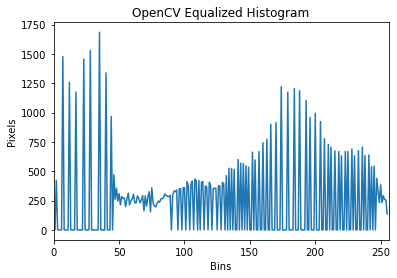

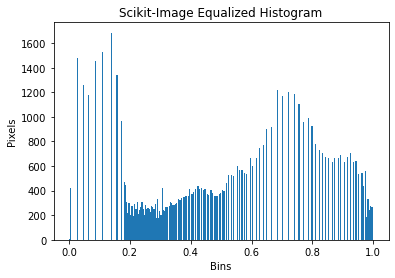

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage.io
from skimage import data, img_as_float
from skimage import io, exposure
import scipy.misc as misc


cameraman = cv2.imread('cameraman.tif')
gray_cameraman = cv2.cvtColor(cameraman, cv2.COLOR_BGR2GRAY)

# a. Equalize the Histogram of the cameraman.tif  image  by using the OpenCV function 
equalize_cv=cv2.equalizeHist(gray_cameraman)
# stack_cv = np.hstack((gray_cameraman, equalize_cv))


# b. Equalize the Histogram by using the scikit-image  function 
equalize_sci = exposure.equalize_hist(gray_cameraman)
stack_sci = np.concatenate((gray_cameraman, equalize_sci), axis=1)
# stack_sci = np.hstack((gray_cameraman, equalize_sci))

# c. Show the histogram after equalization
    # OpenCV Histogram
hist_equalizecv = cv2.calcHist([equalize_cv], [0], None,[256], [0, 256])
plt.figure()
plt.title("OpenCV Equalized Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixels")
plt.plot(hist_equalizecv)
plt.xlim([0,256])
plt.show()

    # Scikit-image Histogram
hist_equalizesci = plt.hist(equalize_sci.ravel(), bins = 256)
plt.title("Scikit-Image Equalized Histogram")
plt.xlabel("Bins")
plt.ylabel("Pixels")
plt.show()

# d. Display the source and equalized images in a window.
    # OpenCV Equalized
stack_cv = np.hstack((gray_cameraman, equalize_cv))

cv2.imshow("Equalized Histogram: Input & Output", stack_cv)
cv2.waitKey(0)


#### e. Again,  compare  the  two  images.  Did  histogram  equalization  help  in  increasing  image contrast? Why or why not? 
Yes It did increase the image contrast.
It increased the contrast because the intensity on the image was adjusted and distributed evenly across the image. 
This way, the area/part of the image with a lower contrast gained higher contrast. 
Which is the sole reason for performing the equalization in the first place
